In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("vaccination_tweets.csv")
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [4]:
import os
import spacy
import re
import string

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


### Missing Value Exploration

In [6]:
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

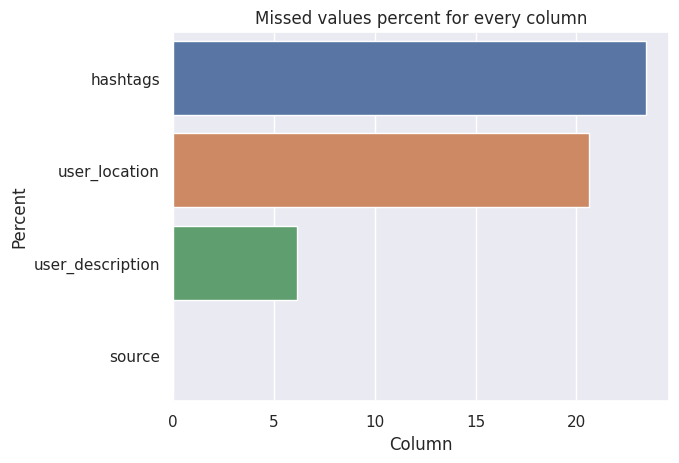

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
#finding the missing percent in each columns
missing_percent = (df.isnull().sum() / len(df)) * 100
df_null=pd.DataFrame(missing_percent)
df_null.columns=['Percent']
df_null=df_null.sort_values('Percent',ascending=False)
df_null = df_null[df_null['Percent']>0]
# create a bar plot
sns.set_theme()
sns.barplot(x=df_null['Percent'], y=df_null.index,orientation='horizontal')
plt.title('Missed values percent for every column')
plt.xlabel('Column')
plt.ylabel('Percent')
plt.show()

In [8]:
x=df['user_name'].value_counts()
top_df=df['user_name'].value_counts()
top_df=pd.DataFrame(x)
top_df['User']=top_df.index
top_df.columns=('Count','User')
top_df=top_df.sort_values('Count',ascending=False)[0:20]

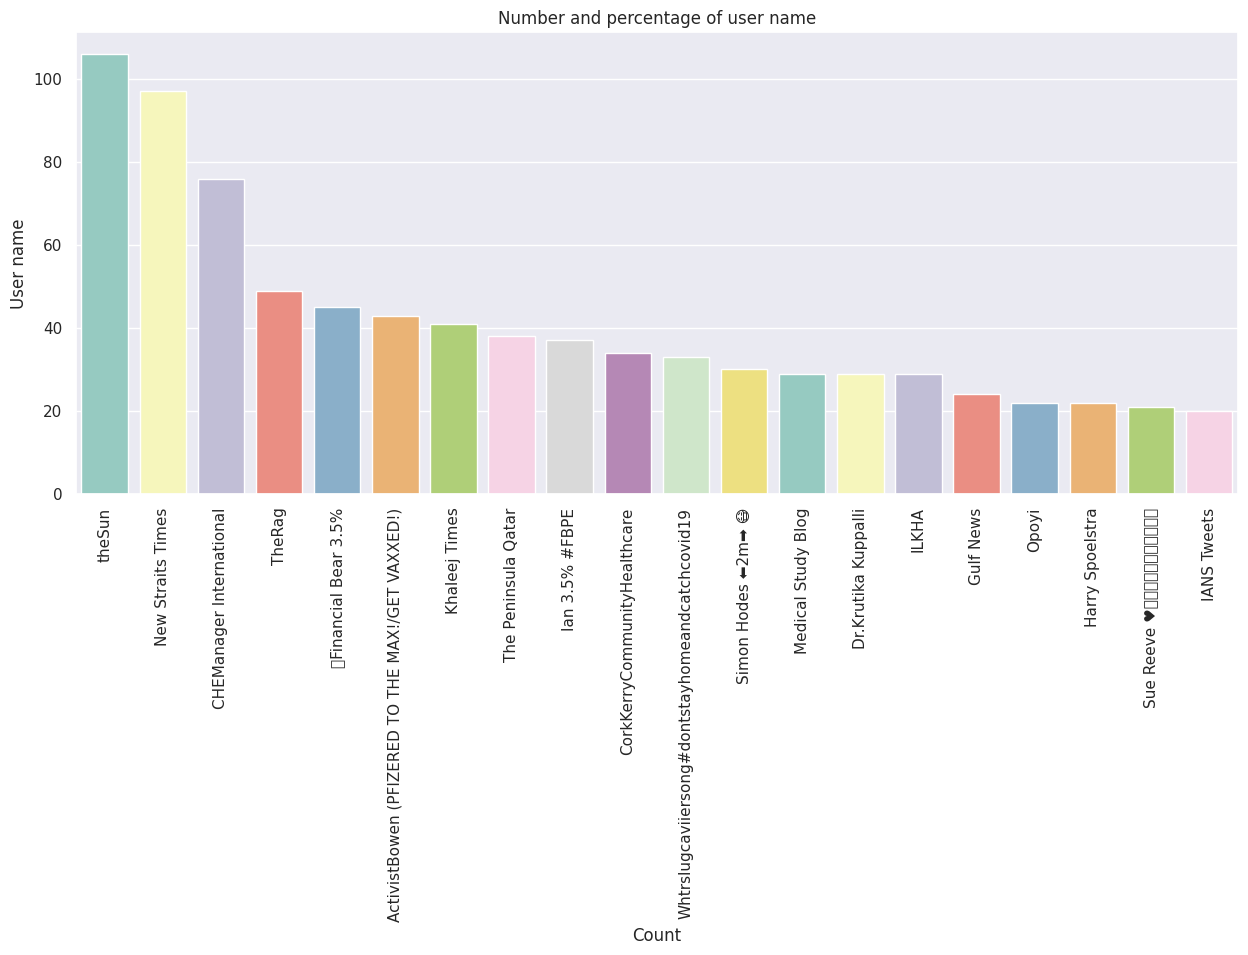

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_df.index,y=top_df['Count'],palette='Set3')
plt.title('Number and percentage of user name')
plt.xlabel('Count')
plt.ylabel('User name')
plt.xticks(rotation=90)
plt.show()

In [10]:
df.shape

(11020, 16)

### Text Cleaning

In [11]:
df['text'] = [entry.lower() for entry in df['text']]

In [12]:
def removePunctuation(x):
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    return re.sub("["+string.punctuation+"]", " ", x)

In [13]:
df['text'] = df['text'].map(removePunctuation)

In [17]:
import nltk
nltk.download('stopwords')
import nltk.corpus
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = [w for w in df['text'] if not w in stop]
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts are immutable senator even when you re...,NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain to me again why we need a vaccine bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


### Sentiment Analysis

In [20]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [21]:
def find_sentiment(tweet):
    if sia.polarity_scores(tweet)["compound"] > 0:
        return "POSITIVE"
    else:
        return "NEGATIVE"   

In [22]:
sent_tweets = df['text'].apply(find_sentiment)

In [23]:
df['sentiment'] = sent_tweets


In [24]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,POSITIVE
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,while the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,NEGATIVE
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,POSITIVE
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts are immutable senator even when you re...,NaN,Twitter Web App,446,2129,False,NEGATIVE
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain to me again why we need a vaccine bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,the number of covid 19 cases today 17 novembe...,NaN,Twitter Web App,2,6,False,POSITIVE
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,first dose \n pfizerbiontech,['PfizerBioNTech'],Twitter for Android,0,4,False,NEGATIVE
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,the number of covid 19 cases today 16 novembe...,NaN,Twitter Web App,3,5,False,POSITIVE
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,pfizerbiontech has developed new pill paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False,POSITIVE


In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wc(df, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(df))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()


In [26]:
data_pos=df[df["sentiment"]=="POSITIVE"]

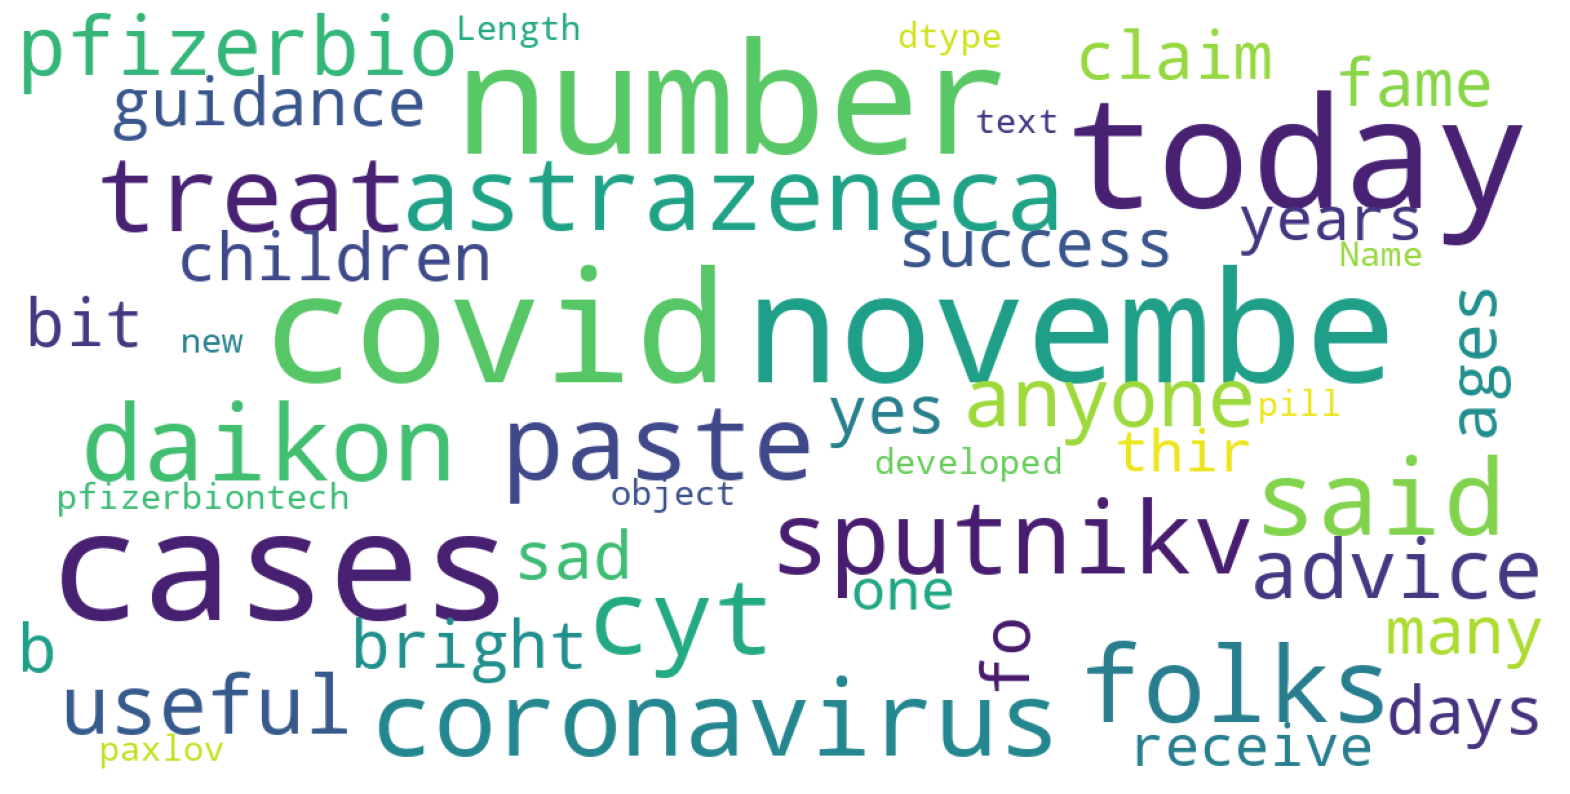

In [28]:
show_wc(data_pos["text"])

In [29]:
data_neg=df[df["sentiment"]=="NEGATIVE"]

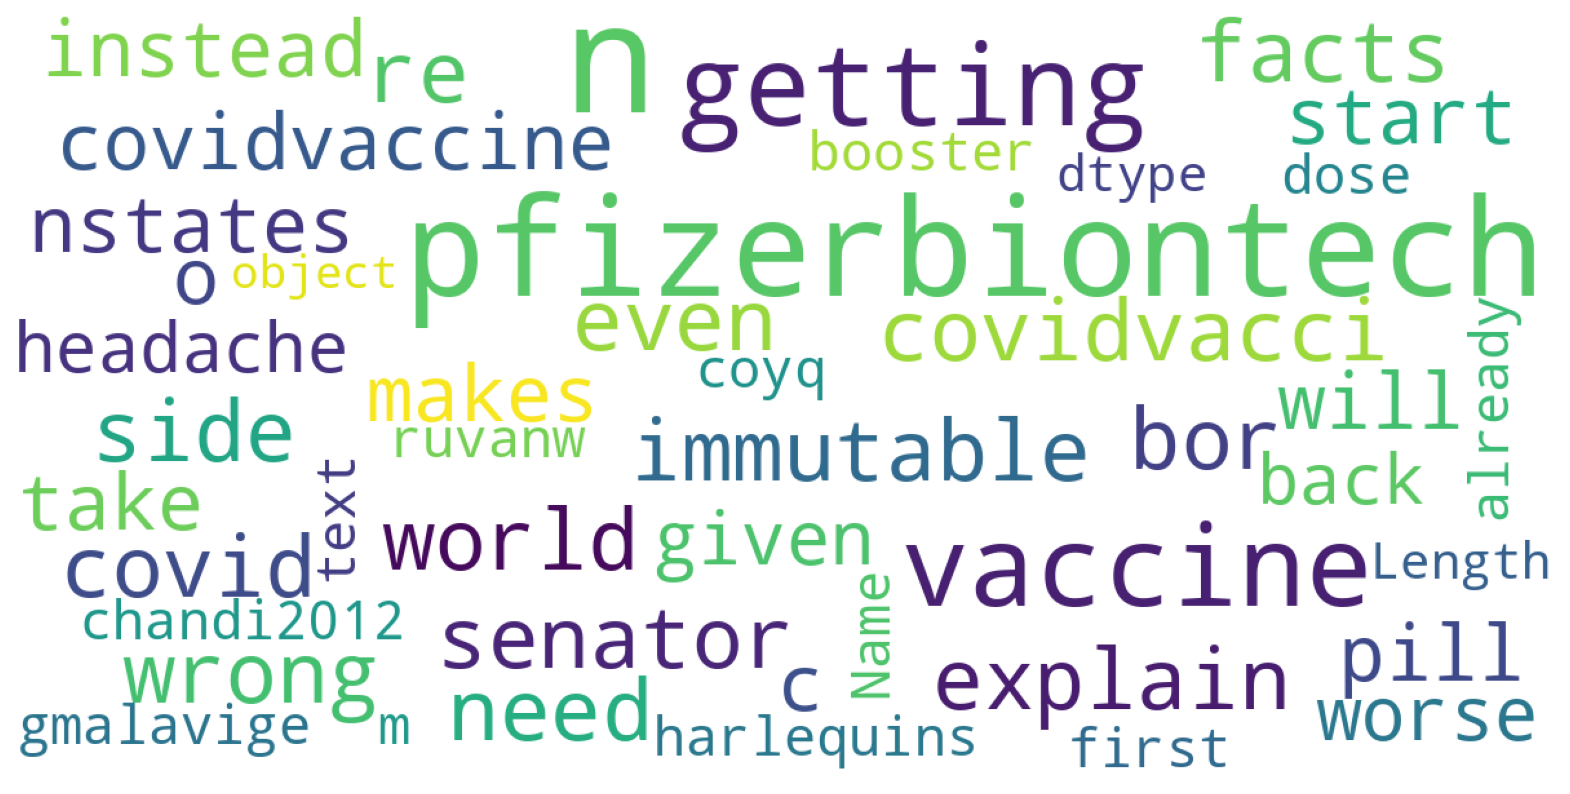

In [30]:
show_wc(data_neg["text"])

In [31]:
from collections import defaultdict
def ngram_func(text, n_gram):
    tok = [tok for tok in text.lower().split(" ") if tok != "" if tok not in stop]
    ngrams = zip(*[tok[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# bigram analysis function
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_func(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "Count_of_Words"]
    return temp_df

In [32]:
bigram_pos = generate_ngrams(data_pos["text"], 2, 20)
bigram_pos

,word,Count_of_Words
0,https co,4332
1,covid 19,527
2,pfizerbiontech vaccine,450
3,pfizerbiontech https,342
4,19 vaccine,236
5,pfizer biontech,225
6,first dose,186
7,dose pfizerbiontech,182
8,covid19 vaccine,161
9,covid vaccine,141


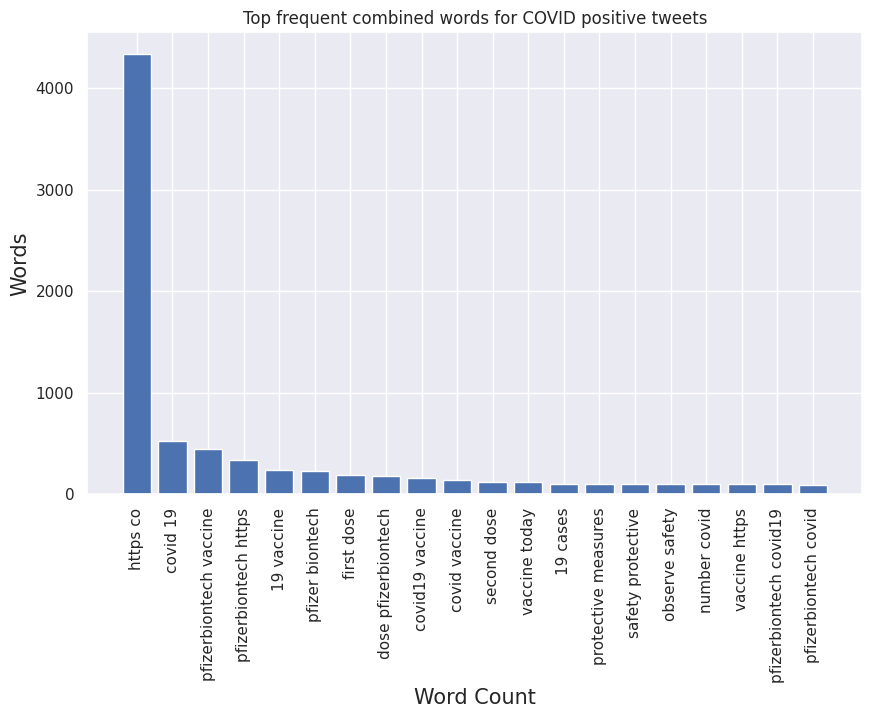

In [33]:
#barplot indicating frequent words in positive tweets
plt.figure(figsize=(10,6))
plt.bar(bigram_pos["word"],bigram_pos["Count_of_Words"])
plt.xticks(rotation=90)
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Words", fontsize=15)
plt.title("Top frequent combined words for COVID positive tweets")
plt.show()

In [34]:
bigram_neg = generate_ngrams(data_neg["text"], 2, 20)
bigram_neg

,word,Count_of_Words
0,https co,5852
1,covid 19,632
2,pfizerbiontech https,570
3,pfizerbiontech vaccine,533
4,19 vaccine,289
5,pfizer biontech,271
6,first dose,232
7,covid19 vaccine,230
8,dose pfizerbiontech,195
9,vaccine https,195


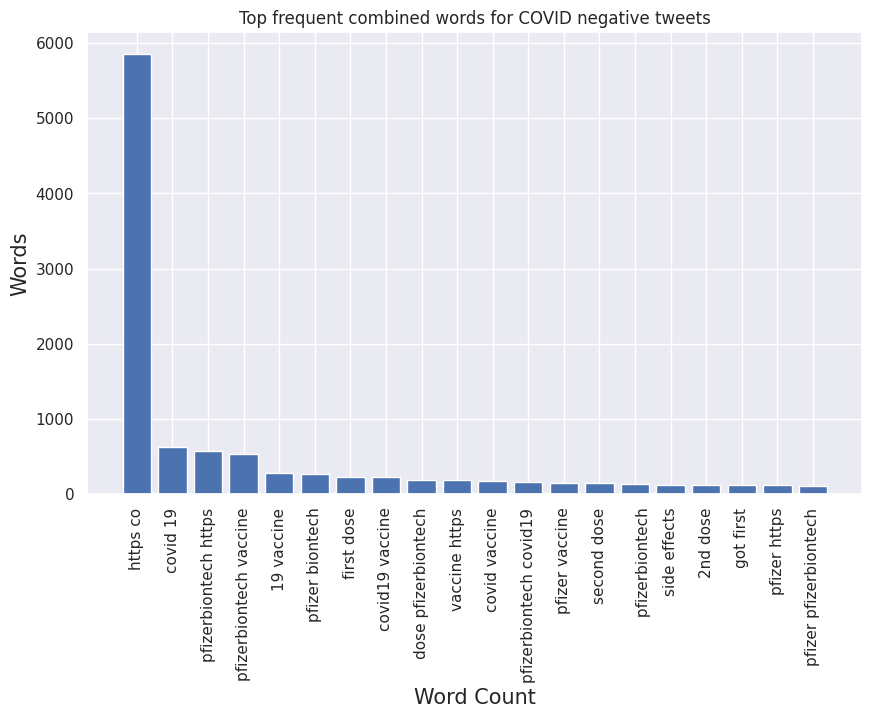

In [35]:
#barplot indicating frequent words in negative tweets
plt.figure(figsize=(10,6))
plt.bar(bigram_neg["word"],bigram_neg["Count_of_Words"])
plt.xticks(rotation=90)
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Words", fontsize=15)
plt.title("Top frequent combined words for COVID negative tweets")
plt.show()

In [36]:
score={"POSITIVE":1,"NEGATIVE":0}
df['sentiment']=df['sentiment'].map(score)

### Feature Engineering

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['sentiment'],test_size=0.2)

In [39]:
Tfidf_vect = TfidfVectorizer(stop_words='english')
X_train_Tfidf = Tfidf_vect.fit_transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_Tfidf ,y_train)

RandomForestClassifier()

### Evaluation

In [41]:
pred=rf.predict(X_test_Tfidf)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1279
           1       0.89      0.72      0.80       925

    accuracy                           0.85      2204
   macro avg       0.86      0.83      0.84      2204
weighted avg       0.85      0.85      0.84      2204

